In [3]:
%matplotlib inline
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [29]:
img = cv2.imread('maxresdefault.jpg');
img

array([[[189, 239, 245],
        [189, 239, 245],
        [189, 239, 245],
        ..., 
        [189, 239, 245],
        [189, 239, 245],
        [189, 239, 245]],

       [[189, 239, 245],
        [189, 239, 245],
        [189, 239, 245],
        ..., 
        [189, 239, 245],
        [189, 239, 245],
        [189, 239, 245]],

       [[189, 239, 245],
        [189, 239, 245],
        [189, 239, 245],
        ..., 
        [189, 239, 245],
        [189, 239, 245],
        [189, 239, 245]],

       ..., 
       [[189, 239, 245],
        [189, 239, 245],
        [189, 239, 245],
        ..., 
        [ 61,  73,  73],
        [ 80,  96,  95],
        [ 82, 103, 101]],

       [[189, 239, 245],
        [189, 239, 245],
        [189, 239, 245],
        ..., 
        [ 56,  68,  68],
        [ 80,  96,  95],
        [ 82, 103, 101]],

       [[191, 239, 245],
        [191, 239, 245],
        [191, 239, 245],
        ..., 
        [ 56,  68,  68],
        [ 80,  96,  95],
        [ 82, 103,

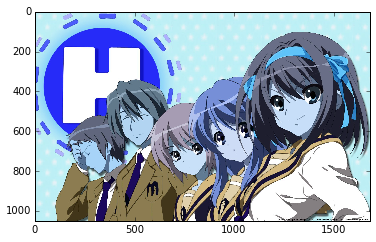

In [30]:
plt.imshow(img) # ブルーマンになる

In [31]:
# BGR => RGBにconvert
imgRGB= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

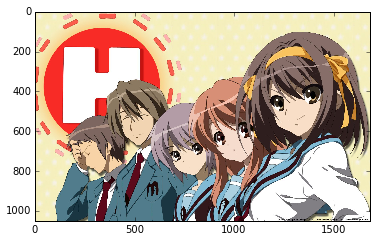

In [32]:
# 見慣れた画像になる
plt.imshow(imgRGB)

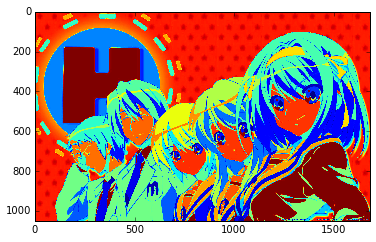

In [33]:
# グレースケールに変換
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img)

!!?


In [34]:
print(gray_img)

[[225 225 225 ..., 225 225 225]
 [225 225 225 ..., 225 225 225]
 [225 225 225 ..., 225 225 225]
 ..., 
 [225 225 225 ...,  69  91  96]
 [225 225 225 ...,  64  91  96]
 [225 225 225 ...,  64  91  96]]


In [36]:
# 画像の平均色を取得
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color = np.uint8(average_color)
print(average_color)

[144 161 182]


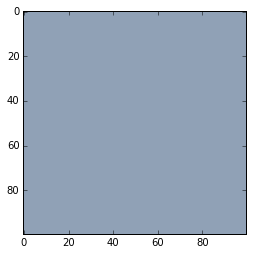

In [37]:
#  100x100の画像に変形（？）
average_color_img = np.array([[average_color]*100]*100, np.uint8)
 
plt.imshow(average_color_img)

・・・・これが平均色らしいです（ブルーマンの画像のね）

# 閾値処理


In [39]:
# 60を閾値としてそれ以上だったら白に、下だったら黒にピクセルを変更する
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY)

60.0

In [41]:
_ # わかりづらいがこれも変数

60.0

In [43]:
threshold_img # これは画像の値

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

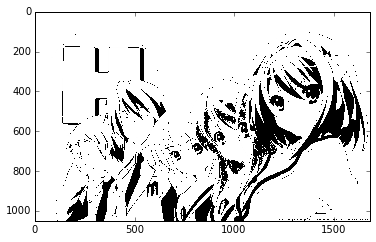

In [44]:
# 白黒画像作成 -> 表示
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)

エエカンジじゃない？

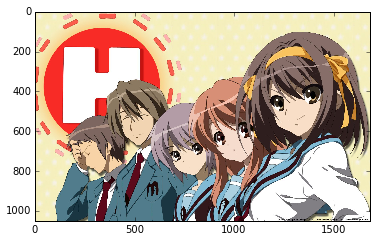

In [75]:
piet = cv2.imread('maxresdefault.jpg')
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2RGB)
plt.imshow(piet_hsv)

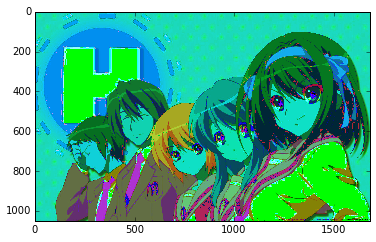

In [77]:
piet_hsv2 = cv2.cvtColor(piet_hsv, cv2.COLOR_RGB2HLS)
plt.imshow(piet_hsv2)

あー色はこうなるんか

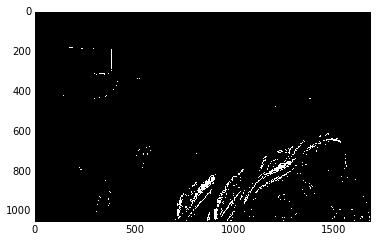

In [78]:
# threshold for hue channel in blue range
blue_min = np.array([100, 100, 100], np.uint8) # ここから
blue_max = np.array([140, 255, 255], np.uint8)  # ここまでにマッチする色を抜き出したい
threshold_blue_img = cv2.inRange(piet_hsv2, blue_min, blue_max)
 
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
 
plt.imshow(threshold_blue_img)

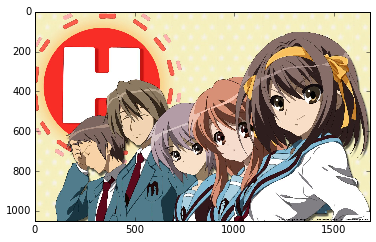

In [80]:
upstate = cv2.imread('maxresdefault.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV)
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB))

これは元画像

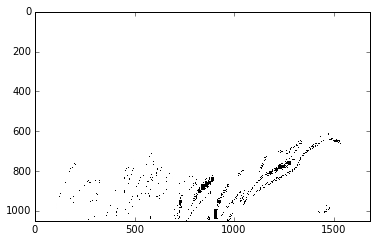

In [82]:
# get mask of pixels that are in blue range
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)
 
# inverse mask to get parts that are not blue
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

マスキング

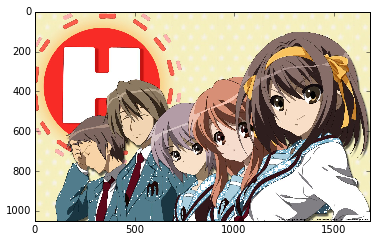

In [83]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
 
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)
 
# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
 
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

マスキングしたところを抜いた箇所（わかりづらい）

# ぼかし

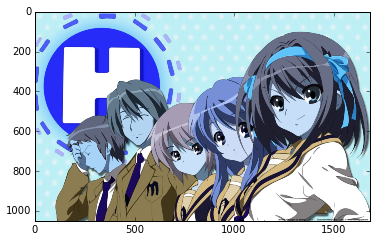

In [86]:
img = cv2.imread('maxresdefault.jpg')
 
# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img_blur_small)

・・・？

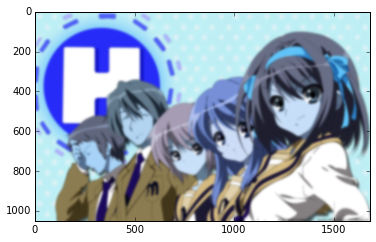

In [99]:
img = cv2.imread('maxresdefault.jpg')
img_blur_small = cv2.GaussianBlur(img, (35,35), 0) # 何故か\d5の値じゃないとダメっぽい。何故かはわからない
plt.imshow(img_blur_small)

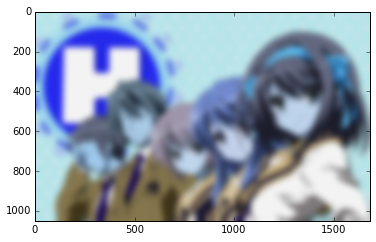

In [100]:
img = cv2.imread('maxresdefault.jpg')
img_blur_small = cv2.GaussianBlur(img, (105,105), 0)
plt.imshow(img_blur_small)

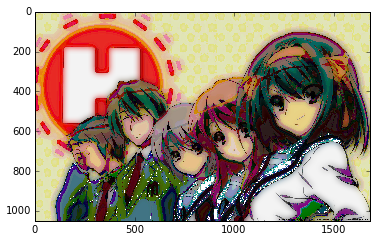

In [102]:
# ↑のぼかした値をさっきのマスクに渡す
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, img_blur_small)
 
# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)
 
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

なんだこれ？

# 輪郭と外接短形

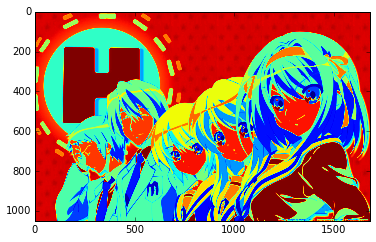

In [109]:
# get binary image and apply Gaussian blur
coins = cv2.imread('maxresdefault.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)
plt.imshow(coins_preprocessed)

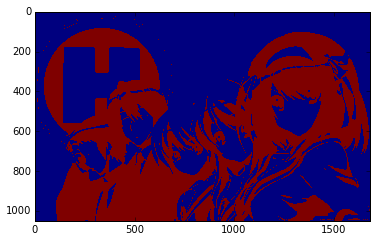

In [110]:
# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)
 
# invert image to get coins
coins_binary = cv2.bitwise_not(coins_binary)
plt.imshow(coins_binary)

おお！

## 輪郭の検出

In [117]:
# find contours
# coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# チュートリアルではできなかった。どうやら返り値のlistが3つになったっぽい
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 
# make copy of image
coins_and_contours = np.copy(coins)
 
# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]
 
# draw contours
cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))
 
# print number of contours
print('number of coins: %d' % len(large_contours))

number of coins: 17


コインが17つだって！

## 外接短形の検出

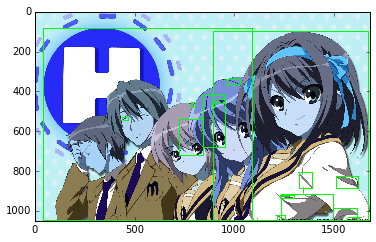

In [119]:
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)
 
# for each contour find bounding box and draw rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(bounding_img)

# エッジ検出

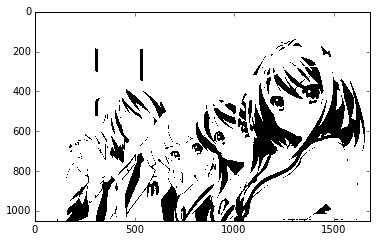

In [121]:
cups = cv2.imread('maxresdefault.jpg')
 
# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)
 
# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 80, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))

## キャニー法

True

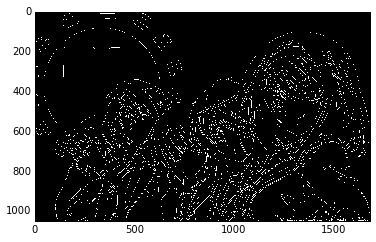

In [122]:
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite('cups-edges.jpg', cups_edges)

## 直線検出

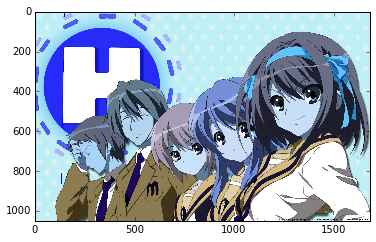

In [124]:
# copy of image to draw lines
cups_lines = np.copy(cups)
 
# find hough lines
num_pix_threshold = 110 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)
 
for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
 
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
 
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 1)

plt.imshow(cups_lines)

・・・・・？